# Recommending songs with a Spotify playlist

## Loading credentials from another config file

In [117]:
import config
import pandas as pd
import random


## Starting with Spotify API

In [3]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

In [4]:
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [5]:
sp.available_markets()

{'markets': ['AD',
  'AE',
  'AG',
  'AL',
  'AM',
  'AO',
  'AR',
  'AT',
  'AU',
  'AZ',
  'BA',
  'BB',
  'BD',
  'BE',
  'BF',
  'BG',
  'BH',
  'BI',
  'BJ',
  'BN',
  'BO',
  'BR',
  'BS',
  'BT',
  'BW',
  'BY',
  'BZ',
  'CA',
  'CD',
  'CG',
  'CH',
  'CI',
  'CL',
  'CM',
  'CO',
  'CR',
  'CV',
  'CW',
  'CY',
  'CZ',
  'DE',
  'DJ',
  'DK',
  'DM',
  'DO',
  'DZ',
  'EC',
  'EE',
  'EG',
  'ES',
  'ET',
  'FI',
  'FJ',
  'FM',
  'FR',
  'GA',
  'GB',
  'GD',
  'GE',
  'GH',
  'GM',
  'GN',
  'GQ',
  'GR',
  'GT',
  'GW',
  'GY',
  'HK',
  'HN',
  'HR',
  'HT',
  'HU',
  'ID',
  'IE',
  'IL',
  'IN',
  'IQ',
  'IS',
  'IT',
  'JM',
  'JO',
  'JP',
  'KE',
  'KG',
  'KH',
  'KI',
  'KM',
  'KN',
  'KR',
  'KW',
  'KZ',
  'LA',
  'LB',
  'LC',
  'LI',
  'LK',
  'LR',
  'LS',
  'LT',
  'LU',
  'LV',
  'LY',
  'MA',
  'MC',
  'MD',
  'ME',
  'MG',
  'MH',
  'MK',
  'ML',
  'MN',
  'MO',
  'MR',
  'MT',
  'MU',
  'MV',
  'MW',
  'MX',
  'MY',
  'MZ',
  'NA',
  'NE',
  'NG',
  'NI

## Use songs of various playlist to build a DataFrame (Spotify Germany)

#### First Playlist: 'Stimmungsmacher'

In [6]:
# First playlist
playlist1 = sp.user_playlist_tracks("spotify", "37i9dQZF1DX3Ebqev5IkYU",market="GE")

In [7]:
# How many songs, does the playlist have?
len(playlist1["items"])

60

In [8]:
# Let's look at itmes and total:
print(list(playlist1.keys()))

['href', 'items', 'limit', 'next', 'offset', 'previous', 'total']


In [9]:
# Let's take a closer look at the structure of JSON
import pprint
pprint.pprint(playlist1)

{'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX3Ebqev5IkYU/tracks?offset=0&limit=100&market=GE&additional_types=track',
 'items': [{'added_at': '2023-04-28T06:50:36Z',
            'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
                         'href': 'https://api.spotify.com/v1/users/',
                         'id': '',
                         'type': 'user',
                         'uri': 'spotify:user:'},
            'is_local': False,
            'primary_color': None,
            'track': {'album': {'album_group': 'single',
                                'album_type': 'single',
                                'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5YGY8feqx7naU7z4HrwZM6'},
                                             'href': 'https://api.spotify.com/v1/artists/5YGY8feqx7naU7z4HrwZM6',
                                             'id': '5YGY8feqx7naU7z4HrwZM6',
                                 

In [10]:
#Access info id of a song we should go to the dictionary 'items'-> list-> access track->id

In [11]:
# Id for first song
playlist1['items'][0]['track']['id']

'0yLdNVWF3Srea0uzk55zFn'

In [12]:
# Get Tracks for all the playlist AND the IDs

def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GE")
    tracks = results['items']
#    while results['next']:
#        results = sp.next(results)
#        tracks.extend(results['items'])
    return results


In [13]:
# Here we find tracks and track_ids
tracks_p1=get_playlist_tracks('spotify','37i9dQZF1DX3Ebqev5IkYU')

In [14]:
# Audio features of the first song
sp.audio_features(tracks_p1['items'][0]["track"]["id"])

[{'danceability': 0.707,
  'energy': 0.681,
  'key': 0,
  'loudness': -4.325,
  'mode': 1,
  'speechiness': 0.0668,
  'acousticness': 0.0632,
  'instrumentalness': 5.15e-06,
  'liveness': 0.0322,
  'valence': 0.646,
  'tempo': 117.999,
  'type': 'audio_features',
  'id': '0yLdNVWF3Srea0uzk55zFn',
  'uri': 'spotify:track:0yLdNVWF3Srea0uzk55zFn',
  'track_href': 'https://api.spotify.com/v1/tracks/0yLdNVWF3Srea0uzk55zFn',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0yLdNVWF3Srea0uzk55zFn',
  'duration_ms': 200455,
  'time_signature': 4}]

In [15]:
(tracks_p1['items'])

[{'added_at': '2023-04-28T06:50:36Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
   'href': 'https://api.spotify.com/v1/users/',
   'id': '',
   'type': 'user',
   'uri': 'spotify:user:'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_group': 'single',
    'album_type': 'single',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5YGY8feqx7naU7z4HrwZM6'},
      'href': 'https://api.spotify.com/v1/artists/5YGY8feqx7naU7z4HrwZM6',
      'id': '5YGY8feqx7naU7z4HrwZM6',
      'name': 'Miley Cyrus',
      'type': 'artist',
      'uri': 'spotify:artist:5YGY8feqx7naU7z4HrwZM6'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/7I0tjwFtxUwBC1vgyeMAax'},
    'href': 'https://api.spotify.com/v1/albums/7I0tjwFtxUwBC1vgyeMAax',
    'id': '7I0tjwFtxUwBC1vgyeMAax',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b273f429549123dbe8552764ba1d',
      'width': 6

In [16]:
# Let us do the list of audiofeatures
list_of_audio_features = []
for i in range(0, len(playlist1['items'])):
                  #print (tracks[item]["track"]["id"])
                  list_of_audio_features.append(sp.audio_features(tracks_p1['items'][i]["track"]["id"])[0])

In [17]:
# Show the list of audio features 
list_of_audio_features

[{'danceability': 0.707,
  'energy': 0.681,
  'key': 0,
  'loudness': -4.325,
  'mode': 1,
  'speechiness': 0.0668,
  'acousticness': 0.0632,
  'instrumentalness': 5.15e-06,
  'liveness': 0.0322,
  'valence': 0.646,
  'tempo': 117.999,
  'type': 'audio_features',
  'id': '0yLdNVWF3Srea0uzk55zFn',
  'uri': 'spotify:track:0yLdNVWF3Srea0uzk55zFn',
  'track_href': 'https://api.spotify.com/v1/tracks/0yLdNVWF3Srea0uzk55zFn',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0yLdNVWF3Srea0uzk55zFn',
  'duration_ms': 200455,
  'time_signature': 4},
 {'danceability': 0.561,
  'energy': 0.965,
  'key': 7,
  'loudness': -3.673,
  'mode': 0,
  'speechiness': 0.0343,
  'acousticness': 0.00383,
  'instrumentalness': 7.07e-06,
  'liveness': 0.371,
  'valence': 0.304,
  'tempo': 128.04,
  'type': 'audio_features',
  'id': '4uUG5RXrOk84mYEfFvj3cK',
  'uri': 'spotify:track:4uUG5RXrOk84mYEfFvj3cK',
  'track_href': 'https://api.spotify.com/v1/tracks/4uUG5RXrOk84mYEfFvj3cK',
  'analysis_url': 'h

In [18]:
# and its length -> all the songs there?
len(list_of_audio_features)

60

In [19]:
# Awesome, let's make a DataFrame out of the list you just created
df1=pd.DataFrame(list_of_audio_features)    
df1=df1[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

df1

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.707,0.681,-4.325,0.0668,0.06320,0.000005,0.0322,0.646,117.999,0yLdNVWF3Srea0uzk55zFn,200455
1,0.561,0.965,-3.673,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4uUG5RXrOk84mYEfFvj3cK,175238
2,0.704,0.797,-5.927,0.0475,0.08260,0.000745,0.0546,0.825,139.994,4h9wh7iOZ0GGn8QVp4RAOB,148486
3,0.520,0.731,-5.338,0.0557,0.34200,0.001010,0.3110,0.662,173.930,4LRPiXqCikLlN15c3yImP7,167303
4,0.565,0.636,-8.198,0.0638,0.10700,0.000010,0.4470,0.525,170.010,76OGwb5RA9h4FxQPT33ekc,179551
5,0.696,0.793,-5.733,0.0970,0.06830,0.000004,0.1800,0.698,120.003,6BePGk3eCan4FqaW2X8Qy3,172253
6,0.773,0.742,-3.678,0.0460,0.02060,0.000000,0.0754,0.571,114.071,0HqZX76SFLDz2aW8aiqi7G,165265
7,0.671,0.636,-8.117,0.1030,0.51500,0.000411,0.1720,0.262,120.966,3uUuGVFu1V7jTQL60S1r8z,148197
8,0.807,0.893,-3.745,0.0347,0.04510,0.000028,0.3660,0.537,126.011,3rmo8F54jFF8OgYsqTxm5d,230747
9,0.796,0.798,-6.312,0.0317,0.03400,0.000042,0.0952,0.942,116.032,6zSpb8dQRaw0M1dK8PBwQz,202735


#### Second Playlist: 'Chillout Lounge'

Playlist_id = '37i9dQZF1DWTvNyxOwkztu'

In [20]:
# Second playlist
playlist2 = sp.user_playlist_tracks("spotify", "37i9dQZF1DWTvNyxOwkztu",market="GE")

In [21]:
# How many songs, does the playlist have?
len(playlist2["items"]) # Spotify registers the songs 50 by 50 

100

In [22]:
# Here we find tracks and track_ids of the second playlist using A NEW FUNCTION
# since the playlist is quite big - we need a while loop

def get_big_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GE")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [23]:
tracks_p2=get_big_playlist_tracks('spotify','37i9dQZF1DWTvNyxOwkztu')

In [24]:
len(tracks_p2)

100

In [25]:
# Let us do the list of audiofeatures
list_of_audio_features2 = []
for i in range(0, len(tracks_p2)):
    audio_features = sp.audio_features(tracks_p2[i]["track"]["id"])
    if audio_features is not None:
        list_of_audio_features2.append(audio_features[0])

In [26]:
# Awesome, let's make a DataFrame out of the list you just created
df2=pd.DataFrame(list_of_audio_features2)    
df2=df2[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

df2

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.737,0.476,-15.889,0.0378,0.58300,0.004900,0.1720,0.3090,117.076,6gOFS1DicuJRiLSB4ZDorp,151795
1,0.646,0.742,-4.960,0.0254,0.02240,0.000050,0.1410,0.1360,104.991,4hHvZD1pcvG8rxUkhau6Is,179429
2,0.659,0.674,-10.415,0.0451,0.63800,0.674000,0.6020,0.0642,120.015,3uRAxz8ic40d9IuNe8fnsb,242000
3,0.599,0.469,-8.369,0.0358,0.72500,0.000101,0.0903,0.2830,120.114,2wk7mBr6JlorYMwESY7lyi,111167
4,0.759,0.672,-10.484,0.0468,0.17400,0.870000,0.1490,0.0885,124.007,32cwP8NCIBrDj0mTcqZfYv,191420
...,...,...,...,...,...,...,...,...,...,...,...
95,0.617,0.712,-10.386,0.0914,0.16700,0.654000,0.4980,0.1780,112.897,75nLmZ3IjorDYevGhuhahs,158369
96,0.488,0.494,-12.979,0.4300,0.29100,0.516000,0.2180,0.1250,122.149,6mxnpHQMS44u4eQ9IQrus5,193817
97,0.675,0.557,-11.416,0.0966,0.61600,0.713000,0.1060,0.4700,91.053,1CRcnpmLaXxdipLh4g0plB,162785
98,0.662,0.668,-10.360,0.0294,0.38200,0.504000,0.2340,0.4090,115.046,63F5su8UafOr42Ixl49jPY,130435


#### Third Playlist: 'Freudigkeit'

Playlist_id = '0pG1gunii41O8gUgXmR8XD'

In [27]:
# Posible function?
def get_playlist_audio_features(username, playlist_id):
    # Get all tracks in the playlist
    results = sp.user_playlist_tracks(username, playlist_id, market="GE")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
        
    # Get audio features for all tracks
    list_of_audio_features = []
    for track in tracks:
        audio_features = sp.audio_features(track['track']['id'])
        if audio_features is not None:
            list_of_audio_features.append(audio_features[0])
    
    # Create a DataFrame of the audio features
    df = pd.DataFrame(list_of_audio_features)
    df = df[["danceability", "energy", "loudness", "speechiness", "acousticness", 
             "instrumentalness", "liveness", "valence", "tempo", "id", "duration_ms"]]
    
    return df

In [28]:
df3 = get_playlist_audio_features('spotify', '0RKKYGTy7VndIdV8tyCROP')

In [29]:
# 'Playlist: Freudigkeit'
df3

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.831,0.735,-6.254,0.0384,0.00397,0.020500,0.1230,0.970,122.979,5EYdTPdJD74r9EVZBztqGG,260507
1,0.755,0.884,-5.296,0.0638,0.02080,0.000003,0.2480,0.897,121.927,7wdzLe2Gsx1RGqbvYZHASz,231933
2,0.565,0.864,-5.821,0.1770,0.04570,0.000149,0.6870,0.584,156.406,07Vvsu4HGrXmD6jAXWE4CK,210773
3,0.917,0.692,-11.665,0.2440,0.18500,0.000011,0.0686,0.819,111.782,0tm6gsXe0LSm9zeSspyMQu,235840
4,0.500,0.501,-8.284,0.0376,0.46200,0.000000,0.2600,0.623,144.438,0cGG2EouYCEEC3xfa0tDFV,153800
...,...,...,...,...,...,...,...,...,...,...,...
162,0.951,0.524,-11.626,0.4030,0.00471,0.000000,0.0358,0.700,106.012,2FfSmCkOikuxMaD1ubPOoI,217359
163,0.678,0.610,-10.509,0.0306,0.46700,0.000000,0.3970,0.919,117.040,5oV1YjM2rtyZ55txHHsFUu,170000
164,0.692,0.711,-7.498,0.0317,0.22500,0.000000,0.1200,0.875,125.135,1TfqLAPs4K3s2rJMoCokcS,216933
165,0.654,0.789,-4.901,0.0322,0.04040,0.000013,0.1190,0.579,110.378,2co8fDyaVmxv8xruQWORnC,260213


In [30]:
# Playlist: cinque scusace
df4 = get_playlist_audio_features('spotify', '0j8ZSA67rvgj9Gb5FhpoeJ')

In [31]:
df4

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.430,0.559,-24.200,0.6010,0.87100,0.225000,0.412,0.234,130.841,35kZ2D9sADNOZ53zWOljkQ,44932
1,0.737,0.858,-3.589,0.0527,0.01240,0.000000,0.382,0.919,144.991,0I0b7uTFfHhBz5bMkSDouF,187862
2,0.445,0.158,-20.665,0.0427,0.90100,0.008870,0.129,0.681,133.659,3KXT4z3ZtA8yasFoqltxzP,161653
3,0.799,0.783,-7.703,0.0847,0.05190,0.021300,0.127,0.918,97.207,5jQcJ2st6yHWhUBjoDoZPH,247587
4,0.775,0.527,-8.761,0.1830,0.03960,0.246000,0.395,0.397,108.361,25d83nKYjGVsQjPcBoVRQI,121947
...,...,...,...,...,...,...,...,...,...,...,...
311,0.764,0.559,-10.856,0.0344,0.00337,0.820000,0.068,0.346,119.004,02CsNQg3AKP7OdDmzzDWc5,381667
312,0.802,0.691,-6.973,0.0466,0.09890,0.000002,0.277,0.452,97.021,1nTzXNZCnZ0T7S8BqkL98r,154507
313,0.927,0.310,-14.604,0.0661,0.50700,0.705000,0.104,0.783,114.513,6jWTWiJ0uce0UuVfJg4knb,189467
314,0.602,0.835,-4.573,0.0413,0.09210,0.000064,0.138,0.496,97.992,62tGzw9OJOwDcjPBnMPCuj,327218


In [32]:
# Playlist: 'Oldies Vibes'
df5 = get_playlist_audio_features('spotify','0vzK3B5KGJ5oTWkMbhAO1F')

In [33]:
df5

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.666,0.788,-7.020,0.0276,0.08840,0.062800,0.2980,0.675,111.257,2u96akbqgCRtkjfLMYrgZo,260773
1,0.514,0.730,-5.934,0.0598,0.00146,0.000095,0.0897,0.334,171.005,0VjIjW4GlUZAMYd2vXMi3b,200040
2,0.527,0.859,-6.685,0.0687,0.17600,0.086600,0.1570,0.443,74.214,37qu58EQ36drTnJVNxXbMP,235627
3,0.889,0.441,-9.506,0.0379,0.04050,0.000788,0.0380,0.963,110.565,41dDygR3r7e926oGUXfrLt,307307
4,0.507,0.642,-12.923,0.0323,0.00299,0.606000,0.1410,0.631,146.154,4OdhffpvG3HxDJMxYOKh97,308933
...,...,...,...,...,...,...,...,...,...,...,...
185,0.445,0.629,-11.268,0.0624,0.35800,0.686000,0.0949,0.396,81.248,6EnKFFz82SDnlWFXXOq6JZ,354333
186,0.970,0.516,-9.641,0.1120,0.13700,0.011000,0.0730,0.964,110.149,1z4wF1YNe3FphOqyD2eRqY,356613
187,0.761,0.484,-14.976,0.0381,0.36600,0.000028,0.1890,0.826,110.450,0EPZixF5ti4OsA8lYrerrg,257213
188,0.527,0.942,-5.640,0.0366,0.01150,0.000000,0.1880,0.495,148.723,7FwBtcecmlpc1sLySPXeGE,241307


In [34]:
#Playlist: 'Barrelhouse'
df6 = get_playlist_audio_features('spotify','5AMZFSBhs7DhWyYfkfLDYR')

In [35]:
df6

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.495,0.435,-9.990,0.0286,0.67000,0.000380,0.1300,0.710,108.189,5YsyqcewwE0c1ukzHVciS3,169160
1,0.350,0.293,-9.502,0.0258,0.75800,0.000008,0.1040,0.162,96.685,6eLL7QTdMWdhhG4i3jHDR9,166467
2,0.396,0.293,-14.062,0.0275,0.94100,0.000196,0.1050,0.343,100.307,44AyOl4qVkzS48vBsbNXaC,182360
3,0.696,0.210,-11.922,0.0670,0.84000,0.000002,0.1070,0.717,93.543,6xNwKNYZcvgV3XTIwsgNio,127560
4,0.570,0.529,-10.769,0.0280,0.37700,0.005090,0.2030,0.934,123.273,0PkBTqRtN25z3oKasWoKlj,145533
...,...,...,...,...,...,...,...,...,...,...,...
327,0.409,0.865,-7.159,0.0592,0.00127,0.830000,0.2350,0.434,138.918,7mu57QtynRbkRhOBiNKKe0,222040
328,0.907,0.483,-5.746,0.0671,0.02500,0.067900,0.5290,0.776,106.995,027mgNmGLPgtdW58JlwvSV,164508
329,0.709,0.494,-9.637,0.0685,0.08980,0.849000,0.2190,0.756,79.001,769dQJ77NN4JnrSARfocOQ,152738
330,0.826,0.559,-4.687,0.0388,0.59000,0.926000,0.0918,0.399,89.714,4Kga4UsecRjySf9xj2gQ0I,310973


In [36]:
#Playlist: 'Deuxemie Partie'
df7 = get_playlist_audio_features('spotify', '7xDnMy1XoKV4zA4uRgJB6i')

In [37]:
df7

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.528,0.0334,-27.697,0.1380,0.073300,0.004310,0.2290,0.455,100.979,1mPcNd9pyilJQxpw4pIMJi,18514
1,0.725,0.5150,-8.278,0.0433,0.313000,0.000977,0.1680,0.266,118.009,0mnxwfe9TDnylcSc2F2q9g,266282
2,0.497,0.7420,-6.353,0.0291,0.001320,0.039500,0.0522,0.209,90.994,18mNRyfNGQvVfwTJo27sNR,235733
3,0.587,0.7220,-6.983,0.0709,0.000754,0.668000,0.5430,0.466,121.964,780be5fB7823aHG06mwTat,180843
4,0.739,0.6630,-6.398,0.2660,0.052900,0.000000,0.1980,0.368,180.025,1R2mapMAUiYqre6jcFX57g,127040
...,...,...,...,...,...,...,...,...,...,...,...
305,0.702,0.6910,-10.474,0.0341,0.870000,0.904000,0.0864,0.497,112.105,6pejFQs6xZUuWKClQkDitL,101238
306,0.748,0.8280,-5.548,0.1490,0.029000,0.000127,0.1530,0.479,123.986,1supkf9D4Obm2yTHqug3m8,171587
307,0.647,0.6440,-9.030,0.0497,0.131000,0.000000,0.2410,0.722,145.797,2C4DwZKxkzv3HHNZq1mm5v,271467
308,0.430,0.7440,-6.910,0.0290,0.442000,0.000016,0.1180,0.711,171.344,5OIRBk8j5qf2ZK63XiARIF,224373


In [38]:
#Playlist: 'Episode 3'
df8 = get_playlist_audio_features('spotify', '4jN8Tq9vVSWpRepNyeLCG1')
df8

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.728,0.681,-10.943,0.2210,0.610000,0.000000,0.0559,0.578,115.944,75zMKn5euxQdlkZgu4P42J,376800
1,0.865,0.591,-9.574,0.0482,0.003360,0.763000,0.0472,0.316,116.983,5HTUbkbWZUgQLaBpPcLFyW,170547
2,0.853,0.497,-16.315,0.0768,0.002910,0.492000,0.0587,0.139,123.012,5ZLfK3AvTbtzY7jI3erhpF,318246
3,0.767,0.547,-11.458,0.0474,0.039900,0.485000,0.0949,0.660,103.030,7nZ9CzhiFRPhOQCn7eDSnn,238183
4,0.711,0.708,-10.197,0.1140,0.005220,0.440000,0.1150,0.517,147.954,0BXPSh0zcKsogLl1GUerCU,125855
...,...,...,...,...,...,...,...,...,...,...,...
369,0.466,0.763,-4.448,0.0318,0.000501,0.000000,0.0973,0.293,154.914,5Az8KU81g2aLBbJN67F2CI,244693
370,0.743,0.655,-5.015,0.1590,0.114000,0.000000,0.0764,0.785,172.031,05bfbizlM5AX6Mf1RRyMho,261335
371,0.642,0.523,-8.579,0.1100,0.772000,0.000003,0.5270,0.654,101.635,3QnHWkNMY2mpy494Bis0ly,185627
372,0.803,0.338,-14.029,0.0349,0.196000,0.038000,0.0970,0.912,106.841,6PgVDY8GTkxF3GmhVGPzoB,155707


In [39]:
#Playlist: 'La Kitchen'
df9 = get_playlist_audio_features('spotify', '5Fov1RR3OBKxttYqdHW0Tw')
df9

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.817,0.815,-5.224,0.0626,0.284000,0.009090,0.1190,0.8850,123.879,3feAr5GHb1yjyhGyS8aoIQ,357413
1,0.729,0.489,-11.468,0.0961,0.575000,0.000651,0.1990,0.3370,87.979,3fqocpNm1lFzc7bIqPocIe,241733
2,0.759,0.536,-11.700,0.0626,0.352000,0.913000,0.0847,0.1470,118.109,4aNm6woQfV9XRkCmk51GSX,383310
3,0.806,0.780,-7.407,0.0397,0.000269,0.795000,0.0961,0.3170,119.998,7BUpmFlSMGK5COcnhVmsvH,425107
4,0.645,0.779,-10.529,0.0315,0.000165,0.214000,0.0941,0.4530,120.007,4QAKfScH8kLJTbJqhb2jp2,229573
...,...,...,...,...,...,...,...,...,...,...,...
85,0.766,0.999,-5.134,0.0921,0.010900,0.871000,0.6650,0.3230,144.994,6tsOCWr9z1y7uZsoY609oK,271159
86,0.671,0.345,-10.471,0.2290,0.044500,0.000331,0.6630,0.3420,109.986,3guNmy1Hk82Kssjzui0hiL,168545
87,0.600,0.718,-7.833,0.1080,0.033500,0.047800,0.1560,0.5970,120.033,4XmKrgMjWhiSfiIKtkI8NX,211120
88,0.647,0.933,-6.544,0.0364,0.002860,0.930000,0.1090,0.8430,150.020,0q75kLhyMDwne5HlyCb17q,269750


In [40]:
#Playlist: Solaris
df10 = get_playlist_audio_features('spotify', '5ksqhpCmTHHPGwoadUDUth')
df10

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.883,0.311,-18.687,0.1290,0.1070,0.383000,0.0791,0.769,126.970,6XcUR70ImgN50ZsbqQMml6,352098
1,0.597,0.402,-12.585,0.0380,0.0151,0.887000,0.1700,0.744,82.176,574ILV8PiK3CpAUMVz7nNM,265410
2,0.623,0.550,-7.594,0.0527,0.7400,0.000001,0.1300,0.396,130.973,2ff11wPbkImzyEgaa2gcWC,232598
3,0.404,0.962,-2.901,0.0978,0.0352,0.000000,0.1460,0.572,158.121,169pWCmfvVazzcL4EXFPgL,182267
4,0.705,0.712,-6.156,0.0385,0.0102,0.000855,0.1000,0.620,97.512,2Y0iGXY6m6immVb2ktbseM,299960
...,...,...,...,...,...,...,...,...,...,...,...
164,0.691,0.659,-11.817,0.0439,0.2680,0.883000,0.1080,0.743,127.015,6wmtEikDlY2JbV0nlrscxy,230551
165,0.782,0.514,-9.964,0.0462,0.0018,0.139000,0.3790,0.540,117.999,21ErLxJOUYnrFTFrJIlJuW,229410
166,0.830,0.695,-9.445,0.0716,0.0248,0.075500,0.0573,0.536,112.046,3CblJq8QQQ0bb7vwJu8c3v,190373
167,0.676,0.688,-8.456,0.0285,0.5290,0.354000,0.1450,0.925,119.990,3nJ0fKxr77H009qiEKKsxP,303960


In [41]:
# Playlist: Modus Mio
df11 = get_playlist_audio_features('spotify', '37i9dQZF1DX36edUJpD76c')
df11

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.841,0.818,-4.682,0.0465,0.00113,0.001910,0.0677,0.6950,129.002,0pC6XqDVKQC4czY2bgF7nj,145607
1,0.836,0.532,-10.946,0.2260,0.10100,0.000018,0.3130,0.7850,93.963,0qCa741ey8PttRgz14D5IG,132766
2,0.618,0.840,-6.213,0.1640,0.08220,0.368000,0.2750,0.5140,97.704,4taclmQm9wFcK4dKQjR5ny,153675
3,0.616,0.646,-5.349,0.0662,0.15800,0.000000,0.1760,0.2310,124.772,1ZKMMvWLhxXlk7VXqS7YRG,205994
4,0.745,0.680,-6.035,0.0891,0.24400,0.001570,0.2050,0.2130,86.036,3TiDVckwzL4Y1StEXFYGt7,167821
5,0.526,0.737,-7.303,0.3030,0.03330,0.000000,0.1450,0.4830,131.901,6DLSBLkABrsLokGPVTk7me,151200
6,0.755,0.570,-9.546,0.1410,0.39500,0.000000,0.2460,0.5270,94.142,0pMrfuW3AFMzqdHbzXuK2x,170373
7,0.701,0.857,-4.667,0.0432,0.03370,0.000088,0.1220,0.2320,164.965,3pyvUdSZvgrmZbXcEsL2bs,170580
8,0.780,0.574,-7.418,0.1020,0.10300,0.000000,0.1350,0.4250,137.034,1rDfZwXzeotPuDtBJotaK1,159869
9,0.707,0.701,-6.679,0.0850,0.14400,0.000000,0.0964,0.7270,169.973,1DLVP4YYfmSey1gBcELyJg,138353


In [42]:
# Playlist: Latin Hit Mix
df12 = get_playlist_audio_features('spotify', '37i9dQZF1DXbLMw3ry7d7k')
df12

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.911,0.712,-5.105,0.0817,0.0901,0.000027,0.0933,0.425,92.005,6Sq7ltF9Qa7SNFBsV5Cogx,178567
1,0.736,0.800,-5.380,0.0525,0.1790,0.000000,0.0498,0.961,140.253,3kf0WdFOalKWBkCCLJo4mA,112087
2,0.699,0.541,-4.943,0.0826,0.0628,0.000000,0.0916,0.365,98.395,6TBzRwnX2oYd8aOrOuyK1p,224921
3,0.594,0.527,-9.335,0.0335,0.1210,0.000000,0.2340,0.692,172.712,23Lyy7ZXRvzfgH4JtDkKrX,194019
4,0.774,0.748,-7.086,0.0352,0.3310,0.005700,0.1260,0.714,135.929,3gfSH9aYZbyGjdmbeoWliw,186828
...,...,...,...,...,...,...,...,...,...,...,...
95,0.736,0.869,-3.873,0.0548,0.1800,0.000000,0.0687,0.783,128.009,4BBTalxG6c1Aoai1x1EA5g,234667
96,0.713,0.617,-6.247,0.0372,0.0770,0.000000,0.3540,0.416,122.036,5enNYN3hDG4Dsey9WsF6TJ,157000
97,0.761,0.784,-4.977,0.1330,0.1500,0.000000,0.1250,0.691,114.930,0Yc0ziTsyjahYqlWXVXlTU,161880
98,0.711,0.711,-6.243,0.4060,0.1020,0.000000,0.1380,0.663,173.945,7EyGZtJuOckQfMDJL1PPrH,169560


In [43]:
# Playlist: All out of 80s
df13 = get_playlist_audio_features('spotify', '37i9dQZF1DX4UtSsGT1Sbe')
df13

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.645,0.795,-12.095,0.0527,0.3470,0.003890,0.1040,0.535,112.067,4RvWPyQ5RL0ao9LPZeSouE,251489
1,0.573,0.902,-7.638,0.0540,0.0180,0.001250,0.0928,0.876,84.412,2WfaOiMkCvy7F5fcp2zZ8L,225280
2,0.446,0.952,-5.321,0.0523,0.0901,0.085700,0.1120,0.624,125.303,7snQQk1zcKl8gZ92AnueZW,356067
3,0.532,0.887,-3.757,0.0335,0.0778,0.000214,0.2940,0.795,122.511,37ZJ0p5Jm13JPevGcx4SkF,249293
4,0.504,0.904,-6.863,0.1790,0.3560,0.121000,0.1400,0.772,176.808,1jDJFeK9x3OZboIAHsY9k2,183440
...,...,...,...,...,...,...,...,...,...,...,...
145,0.684,0.573,-12.300,0.0261,0.3180,0.028000,0.3060,0.716,107.363,273uCXd7NPrInaiNqtkOrA,378947
146,0.658,0.575,-10.365,0.0267,0.2430,0.000000,0.1220,0.504,108.329,6mYrhCAGWzTdF8QnKuchXM,239827
147,0.720,0.828,-9.211,0.0462,0.1850,0.429000,0.0839,0.768,110.071,3SnGymj6ijE2iuUfWxLo1q,323347
148,0.653,0.677,-12.244,0.0396,0.2490,0.000000,0.4030,0.888,114.370,1ynmMEK1fkyiZ6Z6F3ThEt,216533


In [44]:
# 100 Latin classics
df14 = get_playlist_audio_features('spotify','37i9dQZF1DWZJIhAWlsiOv')
df14

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.778,0.824,-5.892,0.0707,0.284,0.000000,0.405,0.758,100.024,3ZFTkvIE7kyPt6Nu3PEa7V,218093
1,0.653,0.524,-9.016,0.0502,0.112,0.000000,0.203,0.553,83.970,6tDDoYIxWvMLTdKpjFkc1B,160191
2,0.813,0.701,-6.508,0.0701,0.489,0.001160,0.294,0.855,104.019,1BwrMGGhPA6GarWIYaFrW8,278867
3,0.815,0.856,-3.825,0.1220,0.400,0.000083,0.244,0.872,91.995,5YJ4BVvTFmVCxUyhKejHfR,151667
4,0.656,0.877,-3.231,0.0342,0.345,0.000000,0.349,0.894,105.018,3QHMxEOAGD51PDlbFPHLyJ,252347
...,...,...,...,...,...,...,...,...,...,...,...
95,0.390,0.263,-6.851,0.0394,0.853,0.000000,0.219,0.446,80.332,2ib9PWWqtNyw9rff0qcm5G,195533
96,0.570,0.301,-13.846,0.0518,0.908,0.574000,0.123,0.431,118.337,6tJ0zwyKkJ9pWXN0XWqLqY,193800
97,0.337,0.550,-5.814,0.0502,0.386,0.000000,0.298,0.851,183.117,1I7QJJ5o76Z9D1rmA4bQPS,128387
98,0.349,0.311,-15.210,0.0366,0.556,0.000000,0.412,0.324,95.226,05CfvXFk8iDBJpxYHi8Kpq,154920


In [45]:
# Reggaeton viejito
df15 = get_playlist_audio_features('spotify', '37i9dQZF1DWWU6Rfto8Ppm')
df15

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.817,0.714,-7.501,0.1410,0.18400,0.000132,0.0420,0.714,94.001,69Ej1xrGjOcHvIMtMKxK0G,204600
1,0.815,0.856,-3.825,0.1220,0.40000,0.000083,0.2440,0.872,91.995,5YJ4BVvTFmVCxUyhKejHfR,151667
2,0.868,0.764,-6.574,0.1670,0.11900,0.001430,0.0918,0.397,96.994,6ksWMnPcHNyNoNf3y1BQCO,263293
3,0.732,0.708,-7.905,0.2620,0.53400,0.000000,0.2370,0.717,175.924,6G4U9avyBNEfP0fAIduev3,267787
4,0.804,0.745,-5.963,0.2290,0.00849,0.000942,0.0378,0.635,183.985,0xJFWROBNTBL4sKEuA5pm6,162400
...,...,...,...,...,...,...,...,...,...,...,...
195,0.796,0.907,-4.608,0.0441,0.03610,0.000009,0.0862,0.608,96.019,6xuCqLILMiXxugbUmuRVJi,181002
196,0.699,0.757,-6.135,0.0588,0.00449,0.000004,0.0769,0.390,175.939,3SXo6PO3z3C0laMLCK9T7h,230240
197,0.891,0.872,-5.440,0.2110,0.02750,0.000000,0.2250,0.852,98.020,3sVpw06XTctdLcq1lnc3Cu,254826
198,0.808,0.850,-2.884,0.0410,0.47000,0.000006,0.1000,0.968,99.994,6jkzF40g6U3S9dJlHed6nJ,195093


In [46]:
# 500 most streamed songs on spotify
df16 = get_playlist_audio_features('spotify', '0JiVp7Z0pYKI8diUV6HJyQ')
df16

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.514,0.730,-5.934,0.0598,0.00146,0.000095,0.0897,0.334,171.005,0VjIjW4GlUZAMYd2vXMi3b,200040
1,0.825,0.652,-3.183,0.0802,0.58100,0.000000,0.0931,0.931,95.977,7qiZfU4dY1lWllzX7mPBI3,233713
2,0.824,0.588,-6.400,0.0924,0.69200,0.000104,0.1490,0.513,98.027,2XU0oxnq2qxCpomAAuJY8K,209438
3,0.501,0.405,-5.679,0.0319,0.75100,0.000000,0.1050,0.446,109.891,7qEHsqek33rTcFNT9PFqLf,182161
4,0.585,0.520,-6.136,0.0712,0.12400,0.000070,0.1310,0.129,159.801,0e7ipj03S05BNilyu5bRzt,218147
...,...,...,...,...,...,...,...,...,...,...,...
495,0.763,0.875,-5.797,0.0262,0.02400,0.000005,0.5990,0.800,123.013,68PCPDZwgg0wz88NFgq9RC,189413
496,0.715,0.624,-3.046,0.1140,0.11000,0.000000,0.1230,0.412,158.087,3HWzoMvoF3TQfYg4UPszDq,173325
497,0.907,0.530,-6.112,0.1270,0.05780,0.000002,0.1010,0.507,135.998,0F7FA14euOIX8KcbEturGH,113000
498,0.736,0.795,-3.299,0.0545,0.49800,0.000001,0.2540,0.511,104.066,6gpcs5eMhJwax4mIfKDYQk,230813


In [47]:
# 500 greatest songs
df17 = get_playlist_audio_features('spotify', '6PXllWbSvbVCc2A2MA406A')
df17

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.460,0.326,-10.699,0.0417,0.142000,0.000010,0.0449,0.321,152.531,1JIzFhI9Lt5FyslawmHCBi,283753
1,0.528,0.456,-8.581,0.0275,0.042400,0.003730,0.3640,0.319,138.650,4JMEhtQ4qQ5mwN7eTLpDpG,233373
2,0.229,0.798,-4.408,0.0407,0.003780,0.000000,0.1920,0.504,154.309,1d53OuuLCEQPfOAn1CjU2k,209507
3,0.470,0.970,-5.175,0.0643,0.000516,0.711000,0.3210,0.642,166.009,3cp3OA33r1KKgQjFehvDLU,297467
4,0.346,0.768,-5.695,0.0377,0.006030,0.380000,0.0244,0.532,169.492,0NWPxcsf5vdjdiFUI8NgkP,210160
...,...,...,...,...,...,...,...,...,...,...,...
491,0.624,0.910,-5.703,0.0297,0.028500,0.000198,0.0789,0.767,104.042,7kzKAuUzOITUauHAhoMoxA,193051
492,0.398,0.930,-6.760,0.0599,0.000854,0.121000,0.0874,0.730,190.840,61JEc6q0APX0WvdweVwbtM,408173
493,0.660,0.837,-12.984,0.0420,0.030500,0.734000,0.1060,0.966,126.716,7jm055kLDXDgBffRkGGlYb,352556
494,0.443,0.956,-6.198,0.0511,0.000052,0.825000,0.1350,0.909,146.754,2JO3HwMRPeya8bXbtbyPcf,206867


In [48]:
# The Beatles discography
df18 = get_playlist_audio_features('spotify', '5MmTZ77dm7ptXVRbuHy6FV')
df18

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.491,0.801,-9.835,0.0361,0.2700,0.00000,0.0665,0.971,160.109,3KiexfmhxHvG5IgAElmTkd,173947
1,0.591,0.605,-10.925,0.0413,0.7070,0.00000,0.3090,0.882,133.348,40qXGg5nRbcWzcFb26KWkQ,108547
2,0.608,0.565,-11.060,0.0336,0.6350,0.00000,0.0601,0.835,109.286,2baEFuU0gQon0hgVRioI1o,177133
3,0.654,0.561,-10.551,0.0304,0.6080,0.00000,0.1290,0.929,129.884,3JQWLa88R35d971o5bIImd,145080
4,0.402,0.860,-10.310,0.0504,0.6070,0.00000,0.7360,0.822,142.445,7JxGM1R32ZqfwZou3VtnTg,146440
...,...,...,...,...,...,...,...,...,...,...,...
188,0.440,0.609,-8.824,0.0358,0.0715,0.00000,0.5820,0.364,165.156,3gwRWIbr5ycEVLIAXrWaw7,217560
189,0.554,0.828,-6.435,0.0739,0.0307,0.00000,0.9070,0.888,90.950,50qHmeex1nPTyQTwBXjSE4,173960
190,0.299,0.329,-10.096,0.0279,0.7560,0.01050,0.0559,0.392,132.282,3mlMpmY8oZIBFc39D9zLbh,218187
191,0.880,0.556,-10.773,0.0855,0.2400,0.04830,0.2400,0.955,128.542,5dpRJkvY8oWMQmQbEQTXhO,152213


In [49]:
# 500 great hip hop songs
df19 = get_playlist_audio_features('spotify', '4H7I33cAIU9zROCsw3noUl')
df19

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.649,0.886,-5.343,0.3680,0.08700,0.000000,0.9550,0.544,96.986,2RwunBL5EEDsjkC6B5P0pY,249400
1,0.947,0.626,-10.106,0.2050,0.02270,0.000003,0.0853,0.724,100.600,5isA9icHWl2651hvfr1EOV,430013
2,0.900,0.845,-7.306,0.2570,0.46500,0.000000,0.0724,0.914,111.187,0FWhGmPVxLI6jOVF0wjALa,427360
3,0.835,0.626,-5.833,0.1250,0.05890,0.000060,0.3960,0.350,91.030,2G7V7zsVDxg1yRsu7Ew9RJ,217925
4,0.763,0.850,-3.052,0.0417,0.03040,0.000001,0.3710,0.761,91.519,3ia3dJETSOllPsv3LJkE35,284907
...,...,...,...,...,...,...,...,...,...,...,...
501,0.557,0.699,-11.625,0.0453,0.00793,0.000000,0.5360,0.887,129.492,1l04CzFskMiq7c30lZvr7i,158333
502,0.942,0.747,-7.844,0.0349,0.36200,0.098600,0.0570,0.961,114.611,5FAN3M34V4lID5m39SIYDZ,295427
503,0.860,0.688,-7.203,0.4340,0.39900,0.000000,0.6700,0.622,100.934,3lcC9CnN7Rpo1ugATzmYjY,303027
504,0.850,0.657,-7.078,0.1660,0.14000,0.019200,0.0939,0.843,137.971,1sSuFkO3m3Cr6YN24NYol5,265667


In [50]:
# 90s hip hop
df20 =  get_playlist_audio_features('spotify', '37i9dQZF1DX186v583rmzp')
df20

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.647,0.514,-10.050,0.0593,0.065500,0.000000,0.3980,0.386,79.975,1DIXPcTDzTj8ZMHt3PDt8p,240693
1,0.816,0.775,-3.323,0.2340,0.160000,0.000310,0.0543,0.527,93.431,503OTo2dSqe7qk76rgsbep,270587
2,0.798,0.744,-5.328,0.1360,0.330000,0.000106,0.2920,0.794,82.356,2qOm7ukLyHUXWyR4ZWLwxA,260000
3,0.901,0.697,-3.439,0.2800,0.145000,0.000000,0.2870,0.670,93.941,7KwZNVEaqikRSBSpyhXK2j,229827
4,0.535,0.505,-8.926,0.2450,0.039300,0.000000,0.0923,0.495,99.935,0uEp9E98JB5awlA084uaIg,320267
...,...,...,...,...,...,...,...,...,...,...,...
95,0.677,0.539,-14.439,0.0630,0.045500,0.000002,0.8450,0.469,95.116,20XdEFyaUR9C7aDIdq2OAd,270973
96,0.725,0.737,-7.453,0.3240,0.000633,0.004170,0.1090,0.219,77.162,2HoDr1yVksl19omOhc1zWy,214067
97,0.902,0.410,-5.305,0.2080,0.182000,0.000000,0.1280,0.641,84.067,2qg9uPP30rLnK56Nfu6wjS,341093
98,0.801,0.550,-11.044,0.2090,0.365000,0.023400,0.1170,0.609,94.994,4WMBl2wiGUSGa5C7tfQEAo,293933


In [51]:
# Punchis 
df21 = get_playlist_audio_features('spotify', '6pjFf3DwrwNf123jy6VQvJ')
df21

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.502,0.599,-8.918,0.3580,0.10600,0.000000,0.389,0.384,172.739,0k28zEVtaL9fwF1UAzgPsB,60701
1,0.860,0.732,-6.956,0.2070,0.00963,0.001150,0.243,0.672,123.963,47EMbBZPg4OBe6m1fijQzj,283706
2,0.884,0.549,-11.683,0.4710,0.03460,0.069800,0.112,0.394,120.461,3Fc7k96EGOGiJBMZUxbpq7,230920
3,0.816,0.488,-8.181,0.0986,0.45900,0.000032,0.457,0.364,121.992,3riInGUedi5A1yVGkfXbUa,225234
4,0.807,0.891,-7.287,0.1050,0.00133,0.147000,0.113,0.299,124.011,0Gi5rWVyNQ8JMHsBdx6GJE,280645
...,...,...,...,...,...,...,...,...,...,...,...
295,0.753,0.617,-8.147,0.0602,0.00244,0.720000,0.799,0.386,120.005,6pGiB9t4M103Gki32zd72c,848016
296,0.911,0.830,-4.353,0.0819,0.00320,0.377000,0.127,0.895,126.006,0lxkCY9FTzfwx6Lyl3OzO4,172700
297,0.967,0.498,-9.336,0.0513,0.01110,0.910000,0.101,0.437,126.394,3OFfOUuQLbwl673WCtpPkc,185824
298,0.647,0.933,-6.544,0.0364,0.00286,0.930000,0.109,0.843,150.020,0q75kLhyMDwne5HlyCb17q,269750


In [52]:
# hours of electronic music
df22 = get_playlist_audio_features('spotify', '1SBelujhB015tNrzcEAe2b')
df22

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.660,0.606,-12.486,0.0595,0.649000,0.916,0.1250,0.8380,140.037,0JHMusx7591n8jxiNTWHQf,231893
1,0.804,0.406,-11.154,0.0472,0.023000,0.837,0.1060,0.1240,120.012,2bB6iDVgm25WkYv0yBz1BD,360705
2,0.653,0.485,-16.170,0.0756,0.163000,0.932,0.1740,0.2000,120.004,3Ha9TeaqCdcS6cqKmFGCO3,711027
3,0.551,0.469,-8.393,0.0296,0.327000,0.161,0.0939,0.4980,75.495,2ZIaH69kaz55RM4Pjx6KXl,252256
4,0.656,0.508,-12.805,0.0372,0.605000,0.902,0.0787,0.1030,113.002,320ePMZ8X0ugeffZk0wNzY,304162
...,...,...,...,...,...,...,...,...,...,...,...
464,0.695,0.928,-5.330,0.0288,0.059100,0.731,0.1150,0.6390,120.996,7kw4p4Nrs48BtlldKEBSUQ,247827
465,0.793,0.625,-10.323,0.0649,0.001410,0.896,0.1160,0.0797,123.986,2MeUeOXWNVBA5nOzwtklXd,366485
466,0.653,0.844,-7.807,0.0376,0.000141,0.878,0.1090,0.1260,120.003,7MoQvl6NFdEt4Y6KKAVx1j,310413
467,0.718,0.838,-9.840,0.0390,0.240000,0.813,0.0856,0.4220,119.986,66QIiW7FZs8zdFmo5zDKCa,200317


In [53]:
# Lofi and techno
df23 = get_playlist_audio_features('spotify', '3PmPN1OdXPbWgnv4wTfGtY')
df23

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.741,0.620,-9.597,0.0804,0.000603,0.884,0.0818,0.2050,120.016,2bQApjSefMdNWtrtG0ffEo,406858
1,0.751,0.716,-10.173,0.0582,0.698000,0.698,0.1170,0.0876,121.991,2IxPD80hhWrq9mwYYW8ge7,414590
2,0.820,0.581,-12.378,0.0983,0.278000,0.878,0.0804,0.1900,124.990,5KkRMv91vbi3rJ44HDpeih,416880
3,0.852,0.692,-9.990,0.2850,0.029000,0.893,0.1110,0.2180,122.962,65tI0uJQaf9wAySniNCwM1,439796
4,0.814,0.932,-9.671,0.2740,0.151000,0.713,0.3480,0.2090,122.045,3aDN9rQCBalFLuuCbmg7VY,445082
...,...,...,...,...,...,...,...,...,...,...,...
647,0.736,0.498,-14.431,0.1030,0.769000,0.883,0.1100,0.1940,126.012,6PxUOH93UKDR5KcrAHrhiT,262857
648,0.777,0.451,-12.911,0.0932,0.767000,0.907,0.0915,0.5470,120.006,7mwDyHlB7NIpldBNUKemNC,310000
649,0.727,0.667,-11.499,0.1700,0.732000,0.509,0.1140,0.6200,124.997,1ZKEZVWwvDjTPrBYaowVI6,360960
650,0.891,0.736,-9.955,0.1540,0.563000,0.852,0.1100,0.0576,136.019,2SHmpnOsl0wwETroGZb28m,296471


In [54]:
#top 500 songs in spanish
df24 = get_playlist_audio_features('spotify', '2DqpNV8w7tgngbJWQD9wS4')
df24

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.659,0.802,-4.790,0.1480,0.20800,0.000000,0.1230,0.863,177.936,7CUYHcu0RnbOnMz4RuN07w,228200
1,0.719,0.779,-3.516,0.1290,0.04510,0.000002,0.0375,0.960,90.973,1PMy8oEMdJ5xPVMaNZPcJf,243893
2,0.763,0.461,-13.139,0.0882,0.00132,0.000411,0.1770,0.269,150.107,3vtotKsn1AJx0eN6pwC2lr,112213
3,0.852,0.773,-2.921,0.0776,0.18700,0.000030,0.1590,0.907,102.034,6mICuAdrwEjh6Y6lroV2Kg,195840
4,0.826,0.773,-4.218,0.0524,0.32300,0.000000,0.1430,0.761,126.899,5iwz1NiezX7WWjnCgY5TH4,238200
...,...,...,...,...,...,...,...,...,...,...,...
471,0.965,0.633,-6.392,0.1010,0.02080,0.000004,0.0715,0.768,108.011,0dCOSNPQizhMMjO6UxGlzi,199000
472,0.574,0.891,-3.665,0.1570,0.08470,0.000000,0.1600,0.707,100.978,21N4Buj4xsyLb218lYle61,183240
473,0.799,0.690,-7.252,0.1000,0.28200,0.001000,0.1430,0.682,106.034,0GmiGIxXDNrePrHBpijYDp,352442
474,0.729,0.773,-2.486,0.1310,0.61100,0.001060,0.2870,0.718,176.053,4fj7e6Tc48Bmomwyz2Z2XC,199091


In [55]:
# Jazz classics
df25 = get_playlist_audio_features('spotify', '3A9dyyfFY4ms2qCmE4XCP9')
df25

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.657,0.2220,-18.186,0.0697,0.869,0.000000,0.0831,0.4800,126.062,79C7NxcxlBEJcyGHGy6ZMD,176840
1,0.526,0.3230,-14.772,0.0785,0.761,0.000000,0.1470,0.5810,109.918,4nvsYD1al0Ush09XL68RZO,185293
2,0.624,0.5580,-8.559,0.0556,0.518,0.000000,0.0603,0.7080,82.753,7D4QULFsjpojAHQLXbnU1u,159222
3,0.286,0.0899,-20.082,0.0399,0.949,0.000521,0.0819,0.2220,50.803,3VS1qUm62nDLZJtxd0V2bb,200933
4,0.799,0.4920,-10.942,0.0549,0.779,0.000108,0.1540,0.8280,134.571,0uWaNJQHQty3YkfLtiJSpT,176027
...,...,...,...,...,...,...,...,...,...,...,...
495,0.494,0.3490,-15.196,0.0352,0.875,0.162000,0.1160,0.6110,102.773,1WrK61qQJ0nWuscM74CzI5,375267
496,0.565,0.0694,-21.971,0.0451,0.992,0.907000,0.1100,0.0777,121.881,3gUHyv6uhuRQMdgjENHfZP,293320
497,0.470,0.0296,-25.411,0.0352,0.991,0.948000,0.0976,0.1840,89.408,1yegDiVa8d94H07ga1SLOt,226200
498,0.469,0.6060,-12.396,0.0804,0.468,0.012400,0.4390,0.4450,109.147,2FCTXM8tikooAxPFkd1rhP,645133


#### Concat the df

In [56]:
df_n_list = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25]
spoti_df = pd.concat(df_n_list)
spoti_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.707,0.6810,-4.325,0.0668,0.06320,0.000005,0.0322,0.6460,117.999,0yLdNVWF3Srea0uzk55zFn,200455
1,0.561,0.9650,-3.673,0.0343,0.00383,0.000007,0.3710,0.3040,128.040,4uUG5RXrOk84mYEfFvj3cK,175238
2,0.704,0.7970,-5.927,0.0475,0.08260,0.000745,0.0546,0.8250,139.994,4h9wh7iOZ0GGn8QVp4RAOB,148486
3,0.520,0.7310,-5.338,0.0557,0.34200,0.001010,0.3110,0.6620,173.930,4LRPiXqCikLlN15c3yImP7,167303
4,0.565,0.6360,-8.198,0.0638,0.10700,0.000010,0.4470,0.5250,170.010,76OGwb5RA9h4FxQPT33ekc,179551
...,...,...,...,...,...,...,...,...,...,...,...
495,0.494,0.3490,-15.196,0.0352,0.87500,0.162000,0.1160,0.6110,102.773,1WrK61qQJ0nWuscM74CzI5,375267
496,0.565,0.0694,-21.971,0.0451,0.99200,0.907000,0.1100,0.0777,121.881,3gUHyv6uhuRQMdgjENHfZP,293320
497,0.470,0.0296,-25.411,0.0352,0.99100,0.948000,0.0976,0.1840,89.408,1yegDiVa8d94H07ga1SLOt,226200
498,0.469,0.6060,-12.396,0.0804,0.46800,0.012400,0.4390,0.4450,109.147,2FCTXM8tikooAxPFkd1rhP,645133


In [57]:
# Let us drop some songs that surely are in more than one playlist
sp_playlist_df = spoti_df.drop_duplicates(keep='first')

In [58]:
# Databasis API Spotify
sp_playlist_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.707,0.6810,-4.325,0.0668,0.06320,0.000005,0.0322,0.6460,117.999,0yLdNVWF3Srea0uzk55zFn,200455
1,0.561,0.9650,-3.673,0.0343,0.00383,0.000007,0.3710,0.3040,128.040,4uUG5RXrOk84mYEfFvj3cK,175238
2,0.704,0.7970,-5.927,0.0475,0.08260,0.000745,0.0546,0.8250,139.994,4h9wh7iOZ0GGn8QVp4RAOB,148486
3,0.520,0.7310,-5.338,0.0557,0.34200,0.001010,0.3110,0.6620,173.930,4LRPiXqCikLlN15c3yImP7,167303
4,0.565,0.6360,-8.198,0.0638,0.10700,0.000010,0.4470,0.5250,170.010,76OGwb5RA9h4FxQPT33ekc,179551
...,...,...,...,...,...,...,...,...,...,...,...
495,0.494,0.3490,-15.196,0.0352,0.87500,0.162000,0.1160,0.6110,102.773,1WrK61qQJ0nWuscM74CzI5,375267
496,0.565,0.0694,-21.971,0.0451,0.99200,0.907000,0.1100,0.0777,121.881,3gUHyv6uhuRQMdgjENHfZP,293320
497,0.470,0.0296,-25.411,0.0352,0.99100,0.948000,0.0976,0.1840,89.408,1yegDiVa8d94H07ga1SLOt,226200
498,0.469,0.6060,-12.396,0.0804,0.46800,0.012400,0.4390,0.4450,109.147,2FCTXM8tikooAxPFkd1rhP,645133


## Let's do a KMean-model!

In [59]:
# We do not need the id_column, so let's drop it
missing_id_df = sp_playlist_df.drop('id', axis=1)
missing_id_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.707,0.6810,-4.325,0.0668,0.06320,0.000005,0.0322,0.6460,117.999,200455
1,0.561,0.9650,-3.673,0.0343,0.00383,0.000007,0.3710,0.3040,128.040,175238
2,0.704,0.7970,-5.927,0.0475,0.08260,0.000745,0.0546,0.8250,139.994,148486
3,0.520,0.7310,-5.338,0.0557,0.34200,0.001010,0.3110,0.6620,173.930,167303
4,0.565,0.6360,-8.198,0.0638,0.10700,0.000010,0.4470,0.5250,170.010,179551
...,...,...,...,...,...,...,...,...,...,...
495,0.494,0.3490,-15.196,0.0352,0.87500,0.162000,0.1160,0.6110,102.773,375267
496,0.565,0.0694,-21.971,0.0451,0.99200,0.907000,0.1100,0.0777,121.881,293320
497,0.470,0.0296,-25.411,0.0352,0.99100,0.948000,0.0976,0.1840,89.408,226200
498,0.469,0.6060,-12.396,0.0804,0.46800,0.012400,0.4390,0.4450,109.147,645133


**K-Means is a distance based algorithm**: we need to scale / normalize!:

In [60]:
# We need to import a scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Now we need to Fit and Transform
scaler.fit(missing_id_df)
missing_id_df_scaled = scaler.transform(missing_id_df)
missing_id_df_scaled = pd.DataFrame(missing_id_df_scaled, columns = missing_id_df.columns)
#Let's see the difference between both df
display(missing_id_df.head())
print()
display(missing_id_df_scaled.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.707,0.681,-4.325,0.0668,0.06320,0.000005,0.0322,0.646,117.999,200455
1,0.561,0.965,-3.673,0.0343,0.00383,0.000007,0.3710,0.304,128.040,175238
2,0.704,0.797,-5.927,0.0475,0.08260,0.000745,0.0546,0.825,139.994,148486
3,0.520,0.731,-5.338,0.0557,0.34200,0.001010,0.3110,0.662,173.930,167303
4,0.565,0.636,-8.198,0.0638,0.10700,0.000010,0.4470,0.525,170.010,179551


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.240846,0.230506,1.169328,-0.280209,-0.713662,-0.711755,-0.979564,0.423393,-0.043895,-0.636141
1,-0.694171,1.579855,1.342128,-0.642497,-0.915767,-0.711750,1.344322,-0.920402,0.342986,-0.894912
2,0.221634,0.781648,0.744748,-0.495352,-0.647621,-0.709751,-0.825919,1.126725,0.803576,-1.169434
3,-0.956745,0.468067,0.900851,-0.403944,0.235417,-0.709034,0.932772,0.486261,2.111135,-0.976339
4,-0.668554,0.016700,0.142862,-0.313651,-0.564560,-0.711742,1.865619,-0.052043,1.960097,-0.850653


### Looking for K

In [61]:
# Let's Import KMeans
from sklearn.cluster import KMeans

# Arbitrary I think we have about 5 genres: Latin, Hip-hop, Jazz, electronic music, Rock
kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans.fit(missing_id_df_scaled)

KMeans(n_clusters=5, random_state=1234)

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

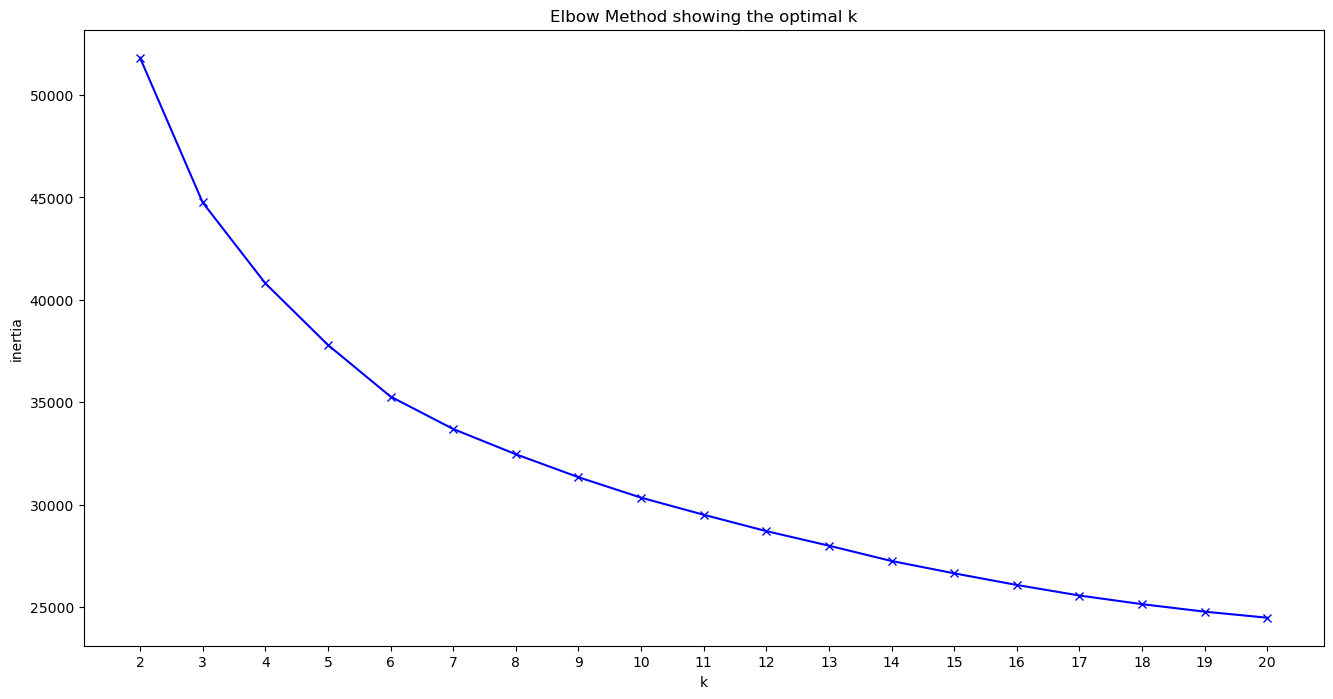

In [62]:
# But let us look at the elbow method to determine a K
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(missing_id_df_scaled)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [63]:
# There is not a clear elbow

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

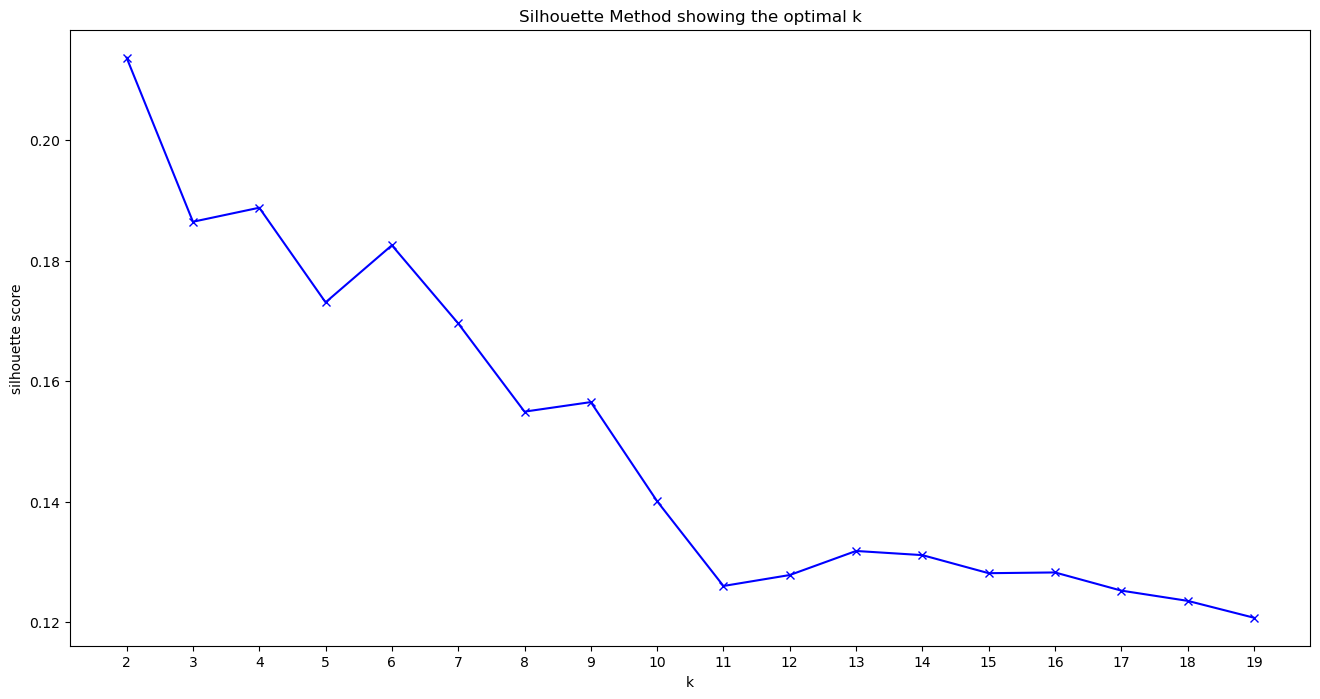

In [64]:
# Let's try silhoutte
import pickle
from sklearn.metrics import silhouette_score

K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(missing_id_df_scaled)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(missing_id_df_scaled, kmeans.predict(missing_id_df_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [65]:
# Here we recognize a peak at 6. We should maybe go for 6 k

kmeans = KMeans(n_clusters= 6, random_state=1234)
kmeans.fit(missing_id_df_scaled)

KMeans(n_clusters=6, random_state=1234)

In [66]:
clusters = kmeans.predict(missing_id_df_scaled)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     336
1    1425
2     639
3    1993
4     859
5    1009
dtype: int64

In [67]:
clusters

array([3, 4, 3, ..., 5, 0, 5], dtype=int32)

In [68]:
# Adding the columnclusters to df
missing_id_df_scaled["cluster"] = clusters
missing_id_df_scaled

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,0.240846,0.230506,1.169328,-0.280209,-0.713662,-0.711755,-0.979564,0.423393,-0.043895,-0.636141,3
1,-0.694171,1.579855,1.342128,-0.642497,-0.915767,-0.711750,1.344322,-0.920402,0.342986,-0.894912,4
2,0.221634,0.781648,0.744748,-0.495352,-0.647621,-0.709751,-0.825919,1.126725,0.803576,-1.169434,3
3,-0.956745,0.468067,0.900851,-0.403944,0.235417,-0.709034,0.932772,0.486261,2.111135,-0.976339,4
4,-0.668554,0.016700,0.142862,-0.313651,-0.564560,-0.711742,1.865619,-0.052043,1.960097,-0.850653,4
...,...,...,...,...,...,...,...,...,...,...,...
6256,-1.123255,-1.346902,-1.711827,-0.632464,2.049834,-0.272997,-0.404766,0.285870,-0.630555,1.157738,5
6257,-0.668554,-2.675345,-3.507413,-0.522106,2.448120,1.744812,-0.445921,-1.809585,0.105679,0.316817,5
6258,-1.276956,-2.864444,-4.419121,-0.632464,2.444716,1.855859,-0.530975,-1.391909,-1.145510,-0.371952,5
6259,-1.283361,-0.125836,-0.969739,-0.128606,0.664341,-0.678184,1.810746,-0.366381,-0.384964,3.927038,0


In [69]:
missing_id_df_scaled[missing_id_df_scaled['cluster'] == 1].sample()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
1393,0.894078,-0.933545,-0.368649,-0.498697,-0.905588,0.894353,-0.792309,1.551081,-0.082117,1.547048,1


In [70]:
# Track_id of given row?
sp_playlist_df.iloc[4583]

danceability                         0.617
energy                               0.627
loudness                             -8.39
speechiness                            0.1
acousticness                         0.214
instrumentalness                  0.000184
liveness                            0.0817
valence                              0.558
tempo                              115.026
id                  5mnFxJAqOUB2ill6KnaFxe
duration_ms                         410410
Name: 343, dtype: object

In [71]:
# Let us here what the row = x would be. We can emebd a song
# The goal is to test what cluster represents what genre

from IPython.display import IFrame

#Function to play songs
def embed_song(track_id):
    display(IFrame(src="https://open.spotify.com/embed/track/"+track_id,
           width="320",
           height="80",
           frameborder="0",
           allowtransparency="true",
           allow="encrypted-media",
          ))
    

In [72]:
embed_song('5mnFxJAqOUB2ill6KnaFxe')

In [73]:
# 0 hip-hop
# 1 electronic/indie ? silent
# 2 seems to be rocky
# 3 seems Hip-Hop
# 4 jazzy?(beach boys)(kariem riggins)
# 5 electronic

In [74]:
conda install -c districtdatalabs yellowbrick

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


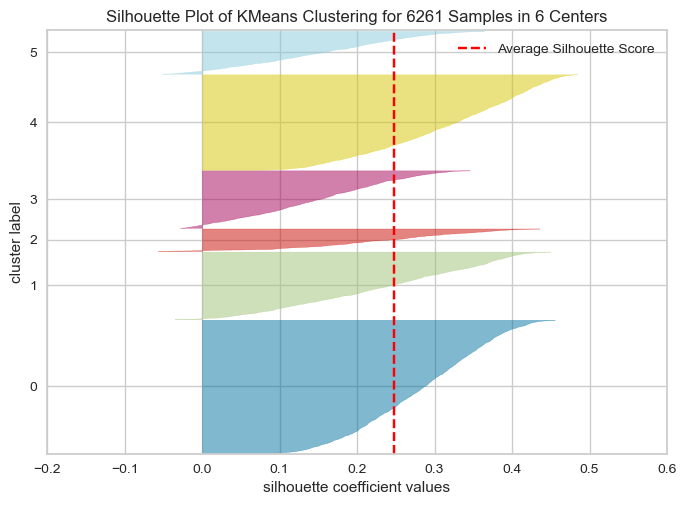

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 6261 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [75]:
# Evaluation

from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(6, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(missing_id_df_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

<b/> Getting audio features (user song)

In [84]:
user_input = input('Please type the name of a song: ')

What song are you listening to: Sunflower


In [85]:
results = sp.search(q = user_input ,limit=1,market="GE")

In [86]:
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=Sunflower&type=track&market=GE&offset=0&limit=1',
  'items': [{'album': {'album_group': 'compilation',
     'album_type': 'compilation',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0LyfQWJT6nXafLPZqxe9Of'},
       'href': 'https://api.spotify.com/v1/artists/0LyfQWJT6nXafLPZqxe9Of',
       'id': '0LyfQWJT6nXafLPZqxe9Of',
       'name': 'Various Artists',
       'type': 'artist',
       'uri': 'spotify:artist:0LyfQWJT6nXafLPZqxe9Of'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/35s58BRTGAEWztPo9WqCIs'},
     'href': 'https://api.spotify.com/v1/albums/35s58BRTGAEWztPo9WqCIs',
     'id': '35s58BRTGAEWztPo9WqCIs',
     'images': [{'height': 640,
       'url': 'https://i.scdn.co/image/ab67616d0000b273e2e352d89826aef6dbd5ff8f',
       'width': 640},
      {'height': 300,
       'url': 'https://i.scdn.co/image/ab67616d00001e02e2e352d89826aef6dbd5ff8f',
       'width': 300},
 

In [90]:
# Id for user_input song
id_song = results['tracks']['items'][0]['id']
embed_song(id_song)

In [88]:
# Audio features of the user song
sp.audio_features(id_song)

[{'danceability': 0.76,
  'energy': 0.479,
  'key': 2,
  'loudness': -5.574,
  'mode': 1,
  'speechiness': 0.0466,
  'acousticness': 0.556,
  'instrumentalness': 0,
  'liveness': 0.0703,
  'valence': 0.913,
  'tempo': 89.911,
  'type': 'audio_features',
  'id': '3KkXRkHbMCARz0aVfEt68P',
  'uri': 'spotify:track:3KkXRkHbMCARz0aVfEt68P',
  'track_href': 'https://api.spotify.com/v1/tracks/3KkXRkHbMCARz0aVfEt68P',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3KkXRkHbMCARz0aVfEt68P',
  'duration_ms': 158040,
  'time_signature': 4}]

In [91]:
user_df = pd.DataFrame(sp.audio_features(id_song))

In [92]:
user_song_df = user_df.drop(['type','id','uri','track_href','analysis_url','time_signature','key','mode'], axis=1)
user_song_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.76,0.479,-5.574,0.0466,0.556,0,0.0703,0.913,89.911,158040


#### Predict cluster for user song

In [93]:
# We need to scale first and use the former scaler
user_song_df_scaled = scaler.transform(user_song_df)
user_song_df_scaled = pd.DataFrame(user_song_df_scaled, columns = user_song_df.columns)
#Let's see the difference between both df
user_song_df_scaled

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.580271,-0.729242,0.838304,-0.505385,0.963907,-0.711769,-0.71823,1.472496,-1.12613,-1.071393


<b/> Predict where User song fits better

In [134]:
prediction = (kmeans.predict(user_song_df_scaled))
prediction

array([3], dtype=int32)

## Recommend a song

In [119]:
# Adding the column clusters to song database
sp_playlist_df["cluster"] = clusters

/var/folders/1y/cx5kjkzn1c7f97jv38f_rcx40000gn/T/ipykernel_3388/1142301694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_playlist_df["cluster"] = clusters


pandas.core.frame.DataFrame

In [124]:
# Reset the index of sp_playlist_df
sp_playlist_df = sp_playlist_df.reset_index(drop=True)

In [131]:
sp_playlist_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,cluster
0,0.707,0.6810,-4.325,0.0668,0.06320,0.000005,0.0322,0.6460,117.999,0yLdNVWF3Srea0uzk55zFn,200455,3
1,0.561,0.9650,-3.673,0.0343,0.00383,0.000007,0.3710,0.3040,128.040,4uUG5RXrOk84mYEfFvj3cK,175238,4
2,0.704,0.7970,-5.927,0.0475,0.08260,0.000745,0.0546,0.8250,139.994,4h9wh7iOZ0GGn8QVp4RAOB,148486,3
3,0.520,0.7310,-5.338,0.0557,0.34200,0.001010,0.3110,0.6620,173.930,4LRPiXqCikLlN15c3yImP7,167303,4
4,0.565,0.6360,-8.198,0.0638,0.10700,0.000010,0.4470,0.5250,170.010,76OGwb5RA9h4FxQPT33ekc,179551,4
...,...,...,...,...,...,...,...,...,...,...,...,...
6256,0.494,0.3490,-15.196,0.0352,0.87500,0.162000,0.1160,0.6110,102.773,1WrK61qQJ0nWuscM74CzI5,375267,5
6257,0.565,0.0694,-21.971,0.0451,0.99200,0.907000,0.1100,0.0777,121.881,3gUHyv6uhuRQMdgjENHfZP,293320,5
6258,0.470,0.0296,-25.411,0.0352,0.99100,0.948000,0.0976,0.1840,89.408,1yegDiVa8d94H07ga1SLOt,226200,5
6259,0.469,0.6060,-12.396,0.0804,0.46800,0.012400,0.4390,0.4450,109.147,2FCTXM8tikooAxPFkd1rhP,645133,0


In [157]:
#Option A
# Random suggetsion
matching_rows = sp_playlist_df[sp_playlist_df['cluster'] == prediction]

# Select a random 'id' value from the matching rows
random_suggestion = random.choice(matching_rows['id'].to_list())

In [162]:
# Suggesting a song
if prediction in sp_playlist_df['cluster'].unique():
    ids_in_cluster = sp_playlist_df.loc[sp_playlist_df['cluster'] == prediction, 'id']
    random_suggestion = random.choice(ids_in_cluster.to_list())
    embed_song(random_suggestion)
else:
    print('Error: Prediction not found in cluster column')

In [197]:
# Function to recommend song out of API spotify
def spoti_recommend(user_input, sp_playlist_df):
    results = sp.search(q = user_input ,limit=1,market="GE")
    id_song = results['tracks']['items'][0]['id']
    user_df = pd.DataFrame(sp.audio_features(id_song))
    user_song_df = user_df.drop(['type','id','uri','track_href','analysis_url','time_signature','key','mode'], axis=1)
    # We need to scale first and use the former scaler
    user_song_df_scaled = scaler.transform(user_song_df)
    user_song_df_scaled = pd.DataFrame(user_song_df_scaled, columns = user_song_df.columns)
    prediction = kmeans.predict(user_song_df_scaled)[0]
    #Here is where song recommendation happens
    if prediction in sp_playlist_df['cluster'].unique():
        ids_in_cluster = sp_playlist_df.loc[sp_playlist_df['cluster'] == prediction]["id"]
        random_suggestion = random.choice(ids_in_cluster.to_list())
        embed_song(random_suggestion)
        print("Here is a suggetsion for you") 
             
    else:
        print('Error: Prediction not found in cluster column')
        

In [215]:
spoti_recommend(input('Please type the name of a song: '), sp_playlist_df)

Please type the name of a song: Shots


Here is a suggetsion for you


In [ ]:
# How to save a pickle
filename = "Model/kmeans.pickle"
with open(filename, "wb") as f:
    pickle.dump(kmeans,f)

In [ ]:
# How to save a scaler
filename = "Model/scaler.pickle"
with open(filename, "wb") as f:
    pickle.dump(scaler,f)

In [ ]:
# Save csv
df_name.to_csv("name of csv.csv", index=False)